In [1]:
pwd

'/scratch/hp2173/mri/General 3D_U-net'

# 1.Preprocess the Datasets

In [2]:
pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt

## 1) Visualize the MRI images 

<ipython-input-3-daae39f04b2f>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
<ipython-input-3-daae39f04b2f>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
<ipython-input-3-daae39f04b2f>:3: DeprecationWarning: get_data() is de

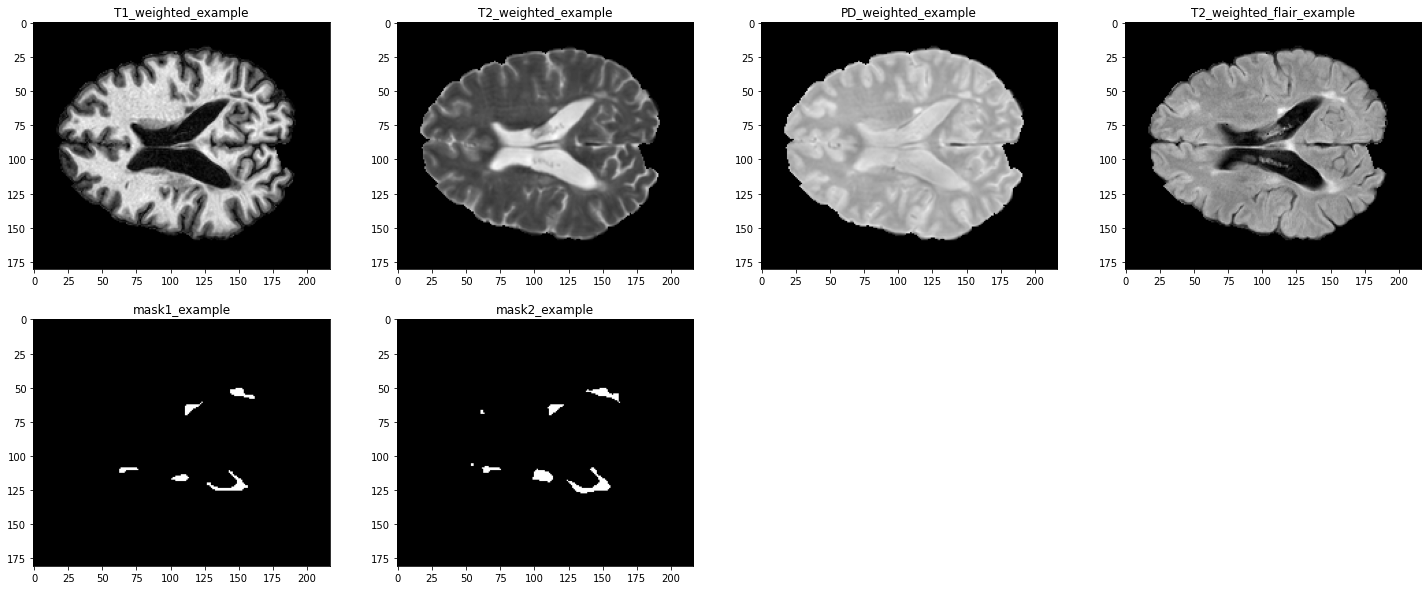

In [3]:
T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
PD_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_pd_pp.nii').get_data()
T2_weighted_flair_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_flair_pp.nii').get_data()
mask1_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask1.nii').get_data()
mask2_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask2.nii').get_data()
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
plt.imshow(T1_weighted_example[:,:,90],'gray')
plt.title('T1_weighted_example')
plt.subplot(2,4,2)
plt.imshow(T2_weighted_example[:,:,90],'gray')
plt.title('T2_weighted_example')
plt.subplot(2,4,3)
plt.imshow(PD_weighted_example[:,:,90],'gray')
plt.title('PD_weighted_example')
plt.subplot(2,4,4)
plt.imshow(T2_weighted_flair_example[:,:,90],'gray')
plt.title('T2_weighted_flair_example')
plt.subplot(2,4,5)
plt.imshow(mask1_example[:,:,90],'gray')
plt.title('mask1_example')
plt.subplot(2,4,6)
plt.imshow(mask2_example[:,:,90],'gray')
plt.title('mask2_example')

plt.pause(3)

In [4]:
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# slide through dicom images using a slide bar 
def dicom_animation(x):
    plt.figure(figsize=(20,10))
    plt.imshow(T1_weighted_example[:,:,x],'gray')
    return x
interact(dicom_animation, x=(0, len(T1_weighted_example)-1))

interactive(children=(IntSlider(value=90, description='x', max=180), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

## 2) Make the custom dataset

In [3]:
import glob

In [4]:
base_path = '/scratch/hp2173/training/'
second_path_list = ['training01/','training02/','training03/','training04/','training05/']
mri_list = []
mask1_list = []
mask2_list = []
for i in range(5):
    timepoint1_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_01_*.nii')
    timepoint2_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_02_*.nii')
    timepoint3_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_03_*.nii')
    timepoint4_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_04_*.nii')
    if i==2:
        timepoint5_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_05_*.nii')
    mask1_path = os.path.join(base_path, second_path_list[i], 'masks/*1.nii')
    mask2_path = os.path.join(base_path, second_path_list[i], 'masks/*2.nii')
    timepoint1_list = sorted(glob.glob(timepoint1_path))
    timepoint2_list = sorted(glob.glob(timepoint2_path))
    timepoint3_list = sorted(glob.glob(timepoint3_path))
    timepoint4_list = sorted(glob.glob(timepoint4_path))
    if i==2:
        timepoint5_list = sorted(glob.glob(timepoint5_path))
    mri_list.append(timepoint1_list)
    mri_list.append(timepoint2_list)
    mri_list.append(timepoint3_list)
    mri_list.append(timepoint4_list)
    if i==2:
        mri_list.append(timepoint5_list)
    mask1_list = mask1_list + sorted(glob.glob(mask1_path))
    mask2_list = mask2_list + sorted(glob.glob(mask2_path))
print('Data Collected:', len(mri_list))
print('Mask1 Collected:', len(mask1_list))
print('Mask2 Collected:', len(mask2_list))

Data Collected: 21
Mask1 Collected: 21
Mask2 Collected: 21


<ipython-input-5-bbfdd6332bd2>:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ex = nib.load(mri_list[0][index+i]).get_data()
<ipython-input-5-bbfdd6332bd2>:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ms1 = nib.load(mask1_list[0]).get_data()
<ipython-input-5-bbfdd6332bd2>:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dat

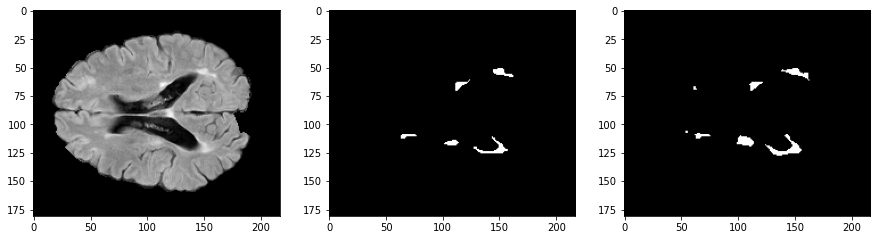

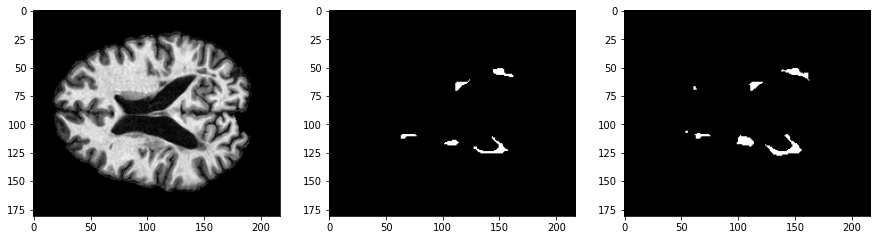

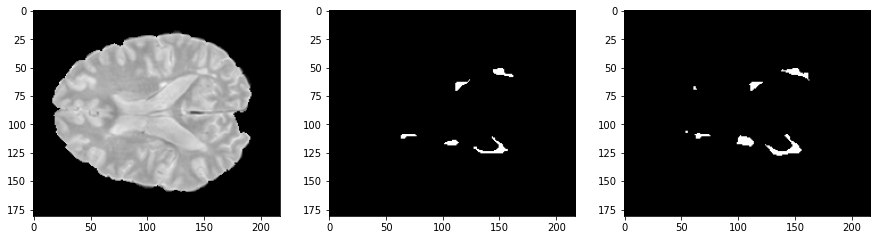

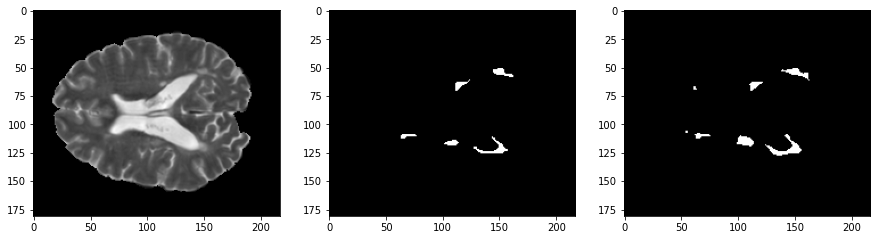

In [5]:
# 0-3:training 1(4 time points)
# 4-7:training 2(4 time points)
# 8-12:training 3(5 time points)
# 13-16:training 4(4 time points)
# 17-20:training 5(4 time points)
# order in one training set: t2_flair_weight, t1_weight, pd_weight, t2_weight

#Display one timepoint(4 type MRI) for one of the training set
index = 0
for i in range(4):
    ex = nib.load(mri_list[0][index+i]).get_data()
    ms1 = nib.load(mask1_list[0]).get_data()
    ms2 = nib.load(mask2_list[0]).get_data()
    plt.figure(figsize=(15,25))
    plt.subplot(5,3,3*i+1)
    plt.imshow(ex[:,:,90],'gray')
    plt.subplot(5,3,3*i+2)
    plt.imshow(ms1[:,:,90],'gray')
    plt.subplot(5,3,3*i+3)
    plt.imshow(ms2[:,:,90],'gray')

In [6]:
train_img_list = mri_list[0:17]
val_img_list = mri_list[17:21]
train_label1_list = mask1_list[0:17]
train_label2_list = mask2_list[0:17]
val_label1_list = mask1_list[17:21]
val_label2_list = mask2_list[17:21]
print ("Training set size: {}". format(len(train_img_list)))
print ("Training label1 size: {}". format(len(train_label1_list)))
print ("Training label2 size: {}". format(len(train_label2_list)))
print ("Validation set size: {}". format(len(val_img_list)))
print ("Validation label1 size: {}". format(len(val_label1_list)))
print ("Validation label2 size: {}". format(len(val_label2_list)))

Training set size: 17
Training label1 size: 17
Training label2 size: 17
Validation set size: 4
Validation label1 size: 4
Validation label2 size: 4


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms, datasets
from torch.utils.data import Dataset
from tqdm import tqdm

class MRIDataset(Dataset):
    def __init__(self, img_path_list, label1_path_list, label2_path_list , IF_TRAIN= False):
        self.mri_path_list = img_path_list
        self.label1_path_list = label1_path_list
        self.label2_path_list = label2_path_list
        self.IF_TRAIN = IF_TRAIN
        #self.transform=transforms.Compose([transforms.Normalize((0.5,),(0.5,))])
        self.mri_list, self.mask1_list, self.mask2_list = self.preprocess() 

    def __len__(self):
        return len(self.mri_list)

    def preprocess(self):
        mri_list, mask1_list, mask2_list, mask_and_list, mask_or_list, mask_rnd_list = [], [], [], [], [], []
        for idx in tqdm(range(len(self.mri_path_list))):
            mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
            mri_t2f = (mri_t2f-mri_t2f.min())/(mri_t2f.max()-mri_t2f.min())
            
            mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
            mri_t1w = (mri_t1w-mri_t1w.min())/(mri_t1w.max()-mri_t1w.min())
            
            mri_pd = torch.Tensor(nib.load(self.mri_path_list[idx][2]).get_data())
            mri_pd = (mri_pd-mri_pd.min())/(mri_pd.max()-mri_pd.min())
            
            mri_t2w = torch.Tensor(nib.load(self.mri_path_list[idx][3]).get_data())
            mri_t2w = (mri_t2w-mri_t2w.min())/(mri_t2w.max()-mri_t2w.min())
            
            mri = torch.cat((mri_t1w.unsqueeze(0),mri_t2w.unsqueeze(0),mri_pd.unsqueeze(0),mri_t2f.unsqueeze(0)),axis=0)
            
            mask1 = torch.Tensor(nib.load(self.label1_path_list[idx]).get_data())
            mask2 = torch.Tensor(nib.load(self.label2_path_list[idx]).get_data())
            
            mri_list.append(mri)
            mask1_list.append(mask1)
            mask2_list.append(mask2)
        return mri_list, mask1_list, mask2_list

    def __getitem__ (self,idx):
        img = self.mri_list[idx]
        mask1 = self.mask1_list[idx]
        mask2 = self.mask2_list[idx]
            
        label1 = torch.Tensor(mask1)
        label2 = torch.Tensor(mask2)

        return img, label1, label2

In [8]:
train_dataset = MRIDataset(train_img_list, train_label1_list, train_label2_list, IF_TRAIN= True)
val_dataset = MRIDataset(val_img_list, val_label1_list, val_label2_list, IF_TRAIN= False)

  0%|          | 0/17 [00:00<?, ?it/s]<ipython-input-7-3e9913983266>:24: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-7-3e9913983266>:27: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-7-3e9913983266>:30: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more pred

In [9]:
NUM_EPOCH = 100
BATCH_SIZE = 4
LR = 0.0005
SAVE_PATH = "/scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/"

In [10]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True, 
                                           num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)

# 2.Build the Network

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
class UNet(nn.Module):
    """
    Implementations based on the Unet3D paper: https://arxiv.org/abs/1606.06650
    """

    def __init__(self, in_channels, n_classes, base_n_filter=8):
        super(UNet, self).__init__()
        self.in_channels = in_channels
        self.n_classes = n_classes
        self.base_n_filter = base_n_filter

        self.lrelu = nn.LeakyReLU()
        self.dropout3d = nn.Dropout3d(p=0.6)
        self.upsacle = nn.Upsample(scale_factor=2, mode='nearest')
        self.softmax = nn.Softmax(dim=1)

        self.conv3d_c1_1 = nn.Conv3d(self.in_channels, self.base_n_filter, kernel_size=3, stride=1, padding=1,bias=False)
        self.conv3d_c1_2 = nn.Conv3d(self.base_n_filter, self.base_n_filter, kernel_size=3, stride=1, padding=1,bias=False)
        self.lrelu_conv_c1 = self.lrelu_conv(self.base_n_filter, self.base_n_filter)
        self.inorm3d_c1 = nn.InstanceNorm3d(self.base_n_filter)

        self.conv3d_c2 = nn.Conv3d(self.base_n_filter, self.base_n_filter * 2, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c2 = self.norm_lrelu_conv(self.base_n_filter * 2, self.base_n_filter * 2)
        self.inorm3d_c2 = nn.InstanceNorm3d(self.base_n_filter * 2)

        self.conv3d_c3 = nn.Conv3d(self.base_n_filter * 2, self.base_n_filter * 4, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c3 = self.norm_lrelu_conv(self.base_n_filter * 4, self.base_n_filter * 4)
        self.inorm3d_c3 = nn.InstanceNorm3d(self.base_n_filter * 4)

        self.conv3d_c4 = nn.Conv3d(self.base_n_filter * 4, self.base_n_filter * 8, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c4 = self.norm_lrelu_conv(self.base_n_filter * 8, self.base_n_filter * 8)
        self.inorm3d_c4 = nn.InstanceNorm3d(self.base_n_filter * 8)

        self.conv3d_c5 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 16, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c5 = self.norm_lrelu_conv(self.base_n_filter * 16, self.base_n_filter * 16)
        self.norm_lrelu_upscale_conv_norm_lrelu_l0 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 16, self.base_n_filter * 8)

        self.conv3d_l0 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 8, kernel_size=1, stride=1, padding=0,bias=False)
        self.inorm3d_l0 = nn.InstanceNorm3d(self.base_n_filter * 8)

        self.conv_norm_lrelu_l1 = self.conv_norm_lrelu(self.base_n_filter * 16, self.base_n_filter * 16)
        self.conv3d_l1 = nn.Conv3d(self.base_n_filter * 16, self.base_n_filter * 8, kernel_size=1, stride=1, padding=0, bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l1 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 8,self.base_n_filter * 4)

        self.conv_norm_lrelu_l2 = self.conv_norm_lrelu(self.base_n_filter * 8, self.base_n_filter * 8)
        self.conv3d_l2 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 4, kernel_size=1, stride=1, padding=0,bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l2 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 4,self.base_n_filter * 2)

        self.conv_norm_lrelu_l3 = self.conv_norm_lrelu(self.base_n_filter * 4, self.base_n_filter * 4)
        self.conv3d_l3 = nn.Conv3d(self.base_n_filter * 4, self.base_n_filter * 2, kernel_size=1, stride=1, padding=0,bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l3 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 2,self.base_n_filter)

        self.conv_norm_lrelu_l4 = self.conv_norm_lrelu(self.base_n_filter * 2, self.base_n_filter * 2)
        self.conv3d_l4 = nn.Conv3d(self.base_n_filter * 2, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)

        self.ds2_1x1_conv3d = nn.Conv3d(self.base_n_filter * 8, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)
        self.ds3_1x1_conv3d = nn.Conv3d(self.base_n_filter * 4, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)
        self.sigmoid = nn.Sigmoid()

    def conv_norm_lrelu(self, feat_in, feat_out):
        return nn.Sequential(
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm3d(feat_out),
            nn.LeakyReLU())

    def norm_lrelu_conv(self, feat_in, feat_out):
        return nn.Sequential(
            nn.InstanceNorm3d(feat_in),
            nn.LeakyReLU(),
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False))

    def lrelu_conv(self, feat_in, feat_out):
        return nn.Sequential(
            nn.LeakyReLU(),
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False))

    def norm_lrelu_upscale_conv_norm_lrelu(self, feat_in, feat_out):
        return nn.Sequential(
            nn.InstanceNorm3d(feat_in),
            nn.LeakyReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            # should be feat_in*2 or feat_in
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm3d(feat_out),
            nn.LeakyReLU())

    def forward(self, x):
        #  Level 1 context pathway
        out = self.conv3d_c1_1(x)
        residual_1 = out
        out = self.lrelu(out)
        out = self.conv3d_c1_2(out)
        out = self.dropout3d(out)
        out = self.lrelu_conv_c1(out)
        # Element Wise Summation
        out += residual_1
        context_1 = self.lrelu(out)
        out = self.inorm3d_c1(out)
        out = self.lrelu(out)

        # Level 2 context pathway
        out = self.conv3d_c2(out)
        residual_2 = out
        out = self.norm_lrelu_conv_c2(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c2(out)
        out += residual_2
        out = self.inorm3d_c2(out)
        out = self.lrelu(out)
        context_2 = out

        # Level 3 context pathway
        out = self.conv3d_c3(out)
        residual_3 = out
        out = self.norm_lrelu_conv_c3(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c3(out)
        out += residual_3
        out = self.inorm3d_c3(out)
        out = self.lrelu(out)
        context_3 = out

        # Level 4 context pathway
        out = self.conv3d_c4(out)
        residual_4 = out
        out = self.norm_lrelu_conv_c4(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c4(out)
        out += residual_4
        out = self.inorm3d_c4(out)
        out = self.lrelu(out)
        context_4 = out

        # Level 5
        out = self.conv3d_c5(out)
        residual_5 = out
        out = self.norm_lrelu_conv_c5(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c5(out)
        out += residual_5
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l0(out)

        out = self.conv3d_l0(out)
        out = self.inorm3d_l0(out)
        out = self.lrelu(out)

        # Level 1 localization pathway
        out = out[:,:,0:-1,:,0:-1]
        out = torch.cat([out, context_4], dim=1)
        out = self.conv_norm_lrelu_l1(out)
        out = self.conv3d_l1(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l1(out)

        # Level 2 localization pathway
        out = out[:,:,:,0:-1,:]
        out = torch.cat([out, context_3], dim=1)
        out = self.conv_norm_lrelu_l2(out)
        ds2 = out
        out = self.conv3d_l2(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l2(out)

        # Level 3 localization pathway
        out = out[:,:,0:-1,0:-1,0:-1]
        out = torch.cat([out, context_2], dim=1)
        out = self.conv_norm_lrelu_l3(out)
        ds3 = out
        out = self.conv3d_l3(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l3(out)

        # Level 4 localization pathway
        out = out[:,:,0:-1,0:-1,0:-1]
        out = torch.cat([out, context_1], dim=1)
        out = self.conv_norm_lrelu_l4(out)
        out_pred = self.conv3d_l4(out)

        ds2_1x1_conv = self.ds2_1x1_conv3d(ds2)
        ds1_ds2_sum_upscale = self.upsacle(ds2_1x1_conv)
        ds3_1x1_conv = self.ds3_1x1_conv3d(ds3)
        ds1_ds2_sum_upscale = ds1_ds2_sum_upscale[:,:,0:-1,0:-1,0:-1]
        ds1_ds2_sum_upscale_ds3_sum = ds1_ds2_sum_upscale + ds3_1x1_conv
        ds1_ds2_sum_upscale_ds3_sum_upscale = self.upsacle(ds1_ds2_sum_upscale_ds3_sum)
        
        ds1_ds2_sum_upscale_ds3_sum_upscale = ds1_ds2_sum_upscale_ds3_sum_upscale[:,:,0:-1,0:-1,0:-1]
        out = out_pred + ds1_ds2_sum_upscale_ds3_sum_upscale
        seg_layer = out
        return seg_layer

# 4.Dice Loss

In [13]:
# define dice coefficient
def dice_coeff(pred, target):
    smooth = 1
    # First let's flatten the matrix to [Batch Size, -1]
    # The flatten operation does not afftect the computation of the above equation
    num = pred.size(0)
    m1 = pred. view(num, -1). float() # Flatten
    m2 = target. view(num, -1). float() # Flatten
    # Then we compute the intersection and the sum of cardinality
    intersection = 2*torch.sum(m1*m2,dim= 1) + smooth
    cardinality = torch.sum(m1**2,dim= 1) + torch.sum(m2**2,dim= 1) + smooth
    # Followed by Dice
    dice = intersection/cardinality
    return dice.mean()
# define SoftDICE loss as 1 - SoftDICE
class SoftDICELoss(nn. Module):
    def __init__(self, smooth = 1):
        super(SoftDICELoss, self). __init__()
        self. smooth = smooth
    def forward(self, pred, target):
        loss = 1 - dice_coeff(pred, target)
        return loss.mean()

# 5.Training

In [14]:
def train_epoch(net, data_loader, optimizer, criterion, epoch):

    net = net.train()
    optimizer.zero_grad()
    loss_stat = []
    loss_stat_mask1 = []
    loss_stat_mask2 = []
    for i, img_mask in enumerate(data_loader):
        img, mask1,mask2 = img_mask

        img = img.to(device)
        mask1 = mask1.to(device)
        mask2 = mask2.to(device)

        pred = net(img)

        loss_mask1 = criterion(pred, mask1)
        loss_mask2 = criterion(pred, mask2)
        loss = (loss_mask1 + loss_mask2)/2.
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        loss_stat += [loss.item()]*img.shape[0]
        loss_stat_mask1 += [loss_mask1.item()]*img.shape[0]
        loss_stat_mask2 += [loss_mask2.item()]*img.shape[0]
        
    print ("Epoch {}: [{}/{}] Loss: {:.3f} Loss_mask1: {:.3f} Loss_mask2: {:.3f}". 
           format(epoch, len(data_loader)-1, len(data_loader)-1,np.mean(loss_stat),np.mean(loss_stat_mask1),np.mean(loss_stat_mask2)))
    return np.mean(loss_stat),np.mean(loss_stat_mask1),np.mean(loss_stat_mask2)

In [15]:
def eval_epoch(net, data_loader, metric, criterion):
    # set model in eval mode to avoid updating BN layer
    net = net.eval()
    
    metric_stat = []
    metric_stat_mask1 = []
    metric_stat_mask2 = []
    
    val_loss_stat = []
    val_stat_mask1 = []
    val_stat_mask2 = []
    for i, img_mask in enumerate(data_loader):
        img, mask1,mask2 = img_mask
        # send data to device
        img = img.to(device)
        mask1 = mask1.to(device)
        mask2 = mask2.to(device)
        # feed data to the model. No need to compute grad.
        with torch.no_grad():
            pred = net(img)
            val_loss_mask1 = criterion(pred, mask1)
            val_loss_mask2 = criterion(pred, mask2)
            val_loss = (val_loss_mask1 + val_loss_mask2)/2.
            
        # eval the results using DICE function as the metric
        # Convert probability to prediction mask
        pred = pred>0.65
        
        err_mask1 = dice_coeff(pred, mask1)
        err_mask2 = dice_coeff(pred, mask2)
        err = (err_mask1 + err_mask2)/2.
        
        metric_stat_mask1 += [err_mask1.item()]*img.shape[0]
        metric_stat_mask2 += [err_mask2.item()]*img.shape[0]
        metric_stat += [err.item()]*img.shape[0]
        
        val_stat_mask1 += [val_loss_mask1.item()]*img.shape[0]
        val_stat_mask2 += [val_loss_mask2.item()]*img.shape[0]
        val_loss_stat += [val_loss.item()]*img.shape[0]
        
    print ("Dice: {:.3f}  Dice_mask1: {:.3f}  Dice_mask2: {:.3f}  Val Loss: {:.3f}  Val Loss_mask1: {:.3f}  Val Loss_mask2: {:.3f} ".
           format(np.mean(metric_stat), np.mean(metric_stat_mask1),np.mean(metric_stat_mask2),
                  np.mean(val_loss_stat),np.mean(val_stat_mask1),np.mean(val_stat_mask2)))
    
    return np.mean(val_loss_stat), np.mean(val_stat_mask1), np.mean(val_stat_mask2), np.mean(metric_stat), np.mean(metric_stat_mask1), np.mean(metric_stat_mask2)

In [19]:
net = UNet(4,1).to(device)
print(net)
n_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('Number of parameters in network: ', n_params)

UNet(
  (lrelu): LeakyReLU(negative_slope=0.01)
  (dropout3d): Dropout3d(p=0.6, inplace=False)
  (upsacle): Upsample(scale_factor=2.0, mode=nearest)
  (softmax): Softmax(dim=1)
  (conv3d_c1_1): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (conv3d_c1_2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (lrelu_conv_c1): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  )
  (inorm3d_c1): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (conv3d_c2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (norm_lrelu_conv_c2): Sequential(
    (0): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1,

In [17]:
optimizer = optim.Adam(net.parameters(), lr= LR)
criterion = SoftDICELoss()

train_loss_list = []
train_loss_list_mask1 = []
train_loss_list_mask2 = []

val_loss_list = []
val_loss_list_mask1 = []
val_loss_list_mask2 = []

val_dice_list = []
val_dice_list_mask1 = []
val_dice_list_mask2 = []

In [21]:
for epoch in range(NUM_EPOCH):    
    loss, loss_mask1, loss_maks2 = train_epoch(net, train_loader, optimizer, criterion, epoch)
    val_loss, val_loss_mask1, val_loss_mask2, dice, dice_mask1, dice_mask2 = eval_epoch(net, val_loader, dice_coeff, criterion)
    
    # Record losses for each epoch
    train_loss_list.append(loss)
    train_loss_list_mask1.append(loss_mask1)
    train_loss_list_mask2.append(loss_maks2)
    
    val_loss_list.append(val_loss)
    val_loss_list_mask1.append(val_loss_mask1)
    val_loss_list_mask2.append(val_loss_mask2)
    
    val_dice_list.append(dice)
    val_dice_list_mask1.append(dice_mask1)
    val_dice_list_mask2.append(dice_mask2)
    
    # Save the model after each epoch
    if os.path.isdir(SAVE_PATH):
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    else:
        os.makedirs(SAVE_PATH, exist_ok=True)
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    print('Checkpoint {} saved to {}'.format(epoch + 1, SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1)))  

Epoch 0: [4/4] Loss: 0.998 Loss_mask1: 0.998 Loss_mask2: 0.997
Dice: 0.008  Dice_mask1: 0.008  Dice_mask2: 0.007  Val Loss: 0.998  Val Loss_mask1: 0.998  Val Loss_mask2: 0.998 
Checkpoint 1 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch1.pth
Epoch 1: [4/4] Loss: 0.991 Loss_mask1: 0.992 Loss_mask2: 0.991
Dice: 0.015  Dice_mask1: 0.016  Dice_mask2: 0.013  Val Loss: 0.994  Val Loss_mask1: 0.994  Val Loss_mask2: 0.995 
Checkpoint 2 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch2.pth
Epoch 2: [4/4] Loss: 0.960 Loss_mask1: 0.961 Loss_mask2: 0.959
Dice: 0.013  Dice_mask1: 0.014  Dice_mask2: 0.011  Val Loss: 0.988  Val Loss_mask1: 0.987  Val Loss_mask2: 0.989 
Checkpoint 3 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch3.pth
Epoch 3: [4/4] Loss: 0.930 Loss_mask1: 0.933 Loss_mask2: 0.927
Dice: 0.082  Dice_mask1: 0.088  Dice_mask2: 0.075  Val Loss: 0.962  Val Loss_mask1: 0.960  Val Loss_mask2: 0.

Epoch 30: [4/4] Loss: 0.312 Loss_mask1: 0.297 Loss_mask2: 0.327
Dice: 0.504  Dice_mask1: 0.537  Dice_mask2: 0.471  Val Loss: 0.501  Val Loss_mask1: 0.470  Val Loss_mask2: 0.533 
Checkpoint 31 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch31.pth
Epoch 31: [4/4] Loss: 0.296 Loss_mask1: 0.293 Loss_mask2: 0.299
Dice: 0.507  Dice_mask1: 0.500  Dice_mask2: 0.514  Val Loss: 0.448  Val Loss_mask1: 0.443  Val Loss_mask2: 0.452 
Checkpoint 32 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch32.pth
Epoch 32: [4/4] Loss: 0.321 Loss_mask1: 0.313 Loss_mask2: 0.329
Dice: 0.590  Dice_mask1: 0.602  Dice_mask2: 0.578  Val Loss: 0.429  Val Loss_mask1: 0.411  Val Loss_mask2: 0.448 
Checkpoint 33 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch33.pth
Epoch 33: [4/4] Loss: 0.291 Loss_mask1: 0.279 Loss_mask2: 0.302
Dice: 0.575  Dice_mask1: 0.587  Dice_mask2: 0.562  Val Loss: 0.405  Val Loss_mask1: 0.387  Val Loss

Epoch 60: [4/4] Loss: 0.220 Loss_mask1: 0.220 Loss_mask2: 0.219
Dice: 0.643  Dice_mask1: 0.660  Dice_mask2: 0.626  Val Loss: 0.341  Val Loss_mask1: 0.315  Val Loss_mask2: 0.367 
Checkpoint 61 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch61.pth
Epoch 61: [4/4] Loss: 0.221 Loss_mask1: 0.217 Loss_mask2: 0.225
Dice: 0.617  Dice_mask1: 0.633  Dice_mask2: 0.601  Val Loss: 0.355  Val Loss_mask1: 0.333  Val Loss_mask2: 0.378 
Checkpoint 62 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch62.pth
Epoch 62: [4/4] Loss: 0.225 Loss_mask1: 0.218 Loss_mask2: 0.231
Dice: 0.546  Dice_mask1: 0.578  Dice_mask2: 0.515  Val Loss: 0.475  Val Loss_mask1: 0.443  Val Loss_mask2: 0.507 
Checkpoint 63 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch63.pth
Epoch 63: [4/4] Loss: 0.239 Loss_mask1: 0.241 Loss_mask2: 0.237
Dice: 0.632  Dice_mask1: 0.653  Dice_mask2: 0.611  Val Loss: 0.349  Val Loss_mask1: 0.322  Val Loss

Epoch 90: [4/4] Loss: 0.196 Loss_mask1: 0.190 Loss_mask2: 0.202
Dice: 0.607  Dice_mask1: 0.637  Dice_mask2: 0.577  Val Loss: 0.375  Val Loss_mask1: 0.342  Val Loss_mask2: 0.407 
Checkpoint 91 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch91.pth
Epoch 91: [4/4] Loss: 0.195 Loss_mask1: 0.195 Loss_mask2: 0.195
Dice: 0.581  Dice_mask1: 0.612  Dice_mask2: 0.550  Val Loss: 0.425  Val Loss_mask1: 0.391  Val Loss_mask2: 0.459 
Checkpoint 92 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch92.pth
Epoch 92: [4/4] Loss: 0.204 Loss_mask1: 0.201 Loss_mask2: 0.206
Dice: 0.633  Dice_mask1: 0.661  Dice_mask2: 0.605  Val Loss: 0.351  Val Loss_mask1: 0.318  Val Loss_mask2: 0.385 
Checkpoint 93 saved to /scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch93.pth
Epoch 93: [4/4] Loss: 0.197 Loss_mask1: 0.195 Loss_mask2: 0.199
Dice: 0.603  Dice_mask1: 0.645  Dice_mask2: 0.562  Val Loss: 0.405  Val Loss_mask1: 0.362  Val Loss

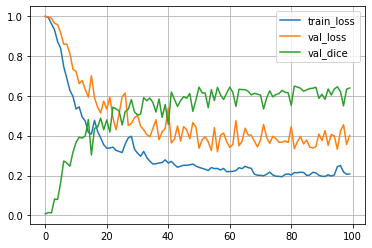

In [23]:
# Plot training loss and validation loss
plt.grid('on')
plt.plot(np.arange(NUM_EPOCH),train_loss_list,label='train_loss')
plt.plot(np.arange(NUM_EPOCH),val_loss_list, label='val_loss')
plt.plot(np.arange(NUM_EPOCH),val_dice_list, label='val_dice')
plt.legend()

# 6.Test

In [24]:
pwd

'/scratch/hp2173/mri/General 3D_U-net'

## Reload the model

In [16]:
checkpoint_path = '/scratch/hp2173/mri/General 3D_U-net/3D U-net_patient_split/MRISegEpoch100.pth'
net = UNet(4,1).to(device)
net.load_state_dict(torch.load(checkpoint_path))
net.eval()

UNet(
  (lrelu): LeakyReLU(negative_slope=0.01)
  (dropout3d): Dropout3d(p=0.6, inplace=False)
  (upsacle): Upsample(scale_factor=2.0, mode=nearest)
  (softmax): Softmax(dim=1)
  (conv3d_c1_1): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (conv3d_c1_2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (lrelu_conv_c1): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  )
  (inorm3d_c1): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (conv3d_c2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (norm_lrelu_conv_c2): Sequential(
    (0): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1,

## Display Result

In [28]:
val_loss, val_loss_mask1, val_loss_mask2, dice, dice_mask1, dice_mask2 = eval_epoch(net, val_loader, dice_coeff, criterion)

Dice: 0.643  Dice_mask1: 0.663  Dice_mask2: 0.624  Val Loss: 0.401  Val Loss_mask1: 0.371  Val Loss_mask2: 0.430 


## Dispaly the output mask

In [27]:
img, mask1, mask2 = val_dataset[0]
result = net(img.unsqueeze(0).to(device)).detach()
mask_pred = result.cpu().numpy()[0,0,:,:,:]
mask_pred[mask_pred>0.65] = 1
mask_pred[mask_pred<=0.65] = 0
print(mask_pred.shape)

(181, 217, 181)


Manual Volume for mask1: 4331.0
Manual Volume for mask2: 4013.0
Segmentation Volume: 4432.0


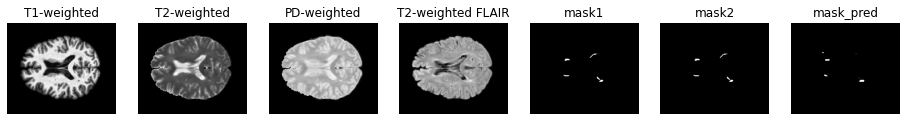

In [31]:
plt.figure(figsize = (16,32))
plt.subplot(1,7,1)
plt.axis('off')
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T1-weighted')
plt.subplot(1,7,2)
plt.axis('off')
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted')
plt.subplot(1,7,3)
plt.axis('off')
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('PD-weighted')
plt.subplot(1,7,4)
plt.axis('off')
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted FLAIR')
plt.subplot(1,7,5)
plt.axis('off')
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask1')
plt.subplot(1,7,6)
plt.axis('off')
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask2')
plt.subplot(1,7,7)
plt.axis('off')
plt.imshow(mask_pred[:,:,90],'gray')
plt.title('mask_pred')

print('Manual Volume for mask1:',mask1.cpu().numpy().sum())
print('Manual Volume for mask2:',mask2.cpu().numpy().sum())
print('Segmentation Volume:',mask_pred.sum())

## Comparing with original and preprocessed

In [31]:
test_datapath = '/scratch/hp2173/testdata_website'

In [32]:
class MRITestDataset(Dataset):
    def __init__(self, img_path_list, IF_TRAIN= False):
        self.mri_path_list = img_path_list
        self.IF_TRAIN = IF_TRAIN
        #self.transform=transforms.Compose([transforms.Normalize((0.5,),(0.5,))])
        self.mri_list = self.preprocess() 

    def __len__(self):
        return len(self.mri_list)

    def preprocess(self):
        mri_list = []
        for idx in tqdm(range(len(self.mri_path_list))):
            mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
            mri_t2f = (mri_t2f-mri_t2f.min())/(mri_t2f.max()-mri_t2f.min())
            
            mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
            mri_t1w = (mri_t1w-mri_t1w.min())/(mri_t1w.max()-mri_t1w.min())
            
            mri_pd = torch.Tensor(nib.load(self.mri_path_list[idx][2]).get_data())
            mri_pd = (mri_pd-mri_pd.min())/(mri_pd.max()-mri_pd.min())
            
            mri_t2w = torch.Tensor(nib.load(self.mri_path_list[idx][3]).get_data())
            mri_t2w = (mri_t2w-mri_t2w.min())/(mri_t2w.max()-mri_t2w.min())
            
            mri = torch.cat((mri_t1w.unsqueeze(0),mri_t2w.unsqueeze(0),mri_pd.unsqueeze(0),mri_t2f.unsqueeze(0)),axis=0)
        
            
            mri_list.append(mri)

        return mri_list

    def __getitem__ (self,idx):
        img = self.mri_list[idx]
        return img

In [33]:
second_testing_path_list = []
for i in range(1,15):
    if i<10:
        second_testing_path_list.append('test0' + str(i) + '/')
    else:
        second_testing_path_list.append('test' + str(i) + '/')
        
print(second_testing_path_list)
mri_test_list = []

for i in range(14):
    timepoint1_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_01_*.nii')
    timepoint2_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_02_*.nii')
    timepoint3_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_03_*.nii')
    timepoint4_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_04_*.nii')
    if (i==1 or i==9 or i==10 or i==13):
        timepoint5_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_05_*.nii')
    if i==9: 
        timepoint6_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_06_*.nii') 
        print(timepoint6_path)
    
    timepoint1_list = sorted(glob.glob(timepoint1_path))
    timepoint2_list = sorted(glob.glob(timepoint2_path))
    timepoint3_list = sorted(glob.glob(timepoint3_path))
    timepoint4_list = sorted(glob.glob(timepoint4_path))

    
    if (i==1 or i==9 or i==10 or i==13):
        timepoint5_list = sorted(glob.glob(timepoint5_path))
    if i==9:
        timepoint6_list = sorted(glob.glob(timepoint6_path))
    
    mri_test_list.append(timepoint1_list)
    mri_test_list.append(timepoint2_list)
    mri_test_list.append(timepoint3_list)
    mri_test_list.append(timepoint4_list)

    if (i==1 or i==9 or i==10 or i==13):
        mri_test_list.append(timepoint5_list)

    if i==9:
        mri_test_list.append(timepoint6_list)
        

print('Data Collected:', len(mri_test_list))

['test01/', 'test02/', 'test03/', 'test04/', 'test05/', 'test06/', 'test07/', 'test08/', 'test09/', 'test10/', 'test11/', 'test12/', 'test13/', 'test14/']
/scratch/hp2173/testdata_website/test10/preprocessed/*_06_*.nii
Data Collected: 61


In [34]:
test_dataset = MRITestDataset(mri_test_list, IF_TRAIN= True)

  0%|          | 0/61 [00:00<?, ?it/s]<ipython-input-32-cca191b18e00>:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-32-cca191b18e00>:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-32-cca191b18e00>:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more p

In [35]:
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=1, 
                                         shuffle=False, 
                                         num_workers=0)

In [36]:
def pre_and_save(net, dataloader):
    net = net.eval()
    num_list = [4,5,4,4,4,4,4,4,4,6,5,4,4,5]
    cnt_num = 0;
    cnt = 0;
    for i, test_input in enumerate(dataloader):
        test_input = test_input.to(device)
        with torch.no_grad():
            pred = net(test_input[0].unsqueeze(0).to(device)).detach()
            pred[pred>0.65] = 1
            pred[pred<=0.65] = 0
            pred = pred.cpu().numpy().squeeze()
            new_image = nib.Nifti1Image(pred, np.eye(4)) 
            
        if (cnt == num_list[cnt_num]):
            cnt_num += 1
            cnt = 0;
        if i < 37:
            nib.save(new_image, '/scratch/hp2173/mri/results/3d_unet/' + 'test0' + str(cnt_num+1) + '_0' + str(cnt+1)+ '_NYU.nii')
        else:
            nib.save(new_image, '/scratch/hp2173/mri/results/3d_unet/' + 'test' + str(cnt_num+1) + '_0' + str(cnt+1)+ '_NYU.nii')
        cnt = cnt+1

In [37]:
num_list = [4,5,4,4,4,4,4,4,4,6,5,4,4,5]
print(sum(num_list))

61


In [38]:
pre_and_save(net, test_loader)

(181, 217, 181)


<ipython-input-52-6faabbbf06db>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  testimg = nib.load('/scratch/hp2173/mri/results/3d_unet/test14_01_NYU.nii').get_data()


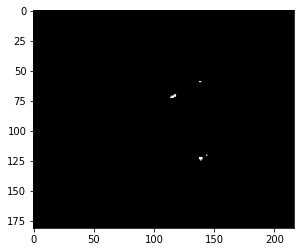

In [52]:
testimg = nib.load('/scratch/hp2173/mri/results/3d_unet/test14_01_NYU.nii').get_data()
print(testimg.shape)
plt.imshow(testimg[:,:,90], cmap='gray')